# Visualize Performance History

## Preliminaries

In [1]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

Using TensorFlow backend.


## Load Movie Review Data

In [2]:
# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

## Create Neural Network Architecture

In [3]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

## Compile Neural Network

In [4]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

## Train Neural Network

In [5]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target
                      epochs=15, # Number of epochs
                      verbose=1, # Print output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 7s 263us/step - loss: 0.5114 - acc: 0.7865 - val_loss: 0.3933 - val_acc: 0.8712
Epoch 2/15
25000/25000 [==============================] - 3s 129us/step - loss: 0.3175 - acc: 0.8976 - val_loss: 0.3174 - val_acc: 0.8858
Epoch 3/15
25000/25000 [==============================] - 3s 113us/step - loss: 0.2438 - acc: 0.9194 - val_loss: 0.2893 - val_acc: 0.8890
Epoch 4/15
25000/25000 [==============================] - 3s 104us/step - loss: 0.2075 - acc: 0.9272 - val_loss: 0.2841 - val_acc: 0.8880
Epoch 5/15
25000/25000 [==============================] - 3s 112us/step - loss: 0.1766 - acc: 0.9412 - val_loss: 0.2855 - val_acc: 0.8868
Epoch 6/15
25000/25000 [==============================] - 3s 120us/step - loss: 0.1586 - acc: 0.9438 - val_loss: 0.3115 - val_acc: 0.8772
Epoch 7/15
25000/25000 [==============================] - 3s 104us/step - loss: 0.1391 - acc: 0.9531 - val_loss: 0.3385 - 

## Visualize Neural Network Performance History

Specifically, we visualize the neural network’s accuracy score on training and test sets over each epoch.

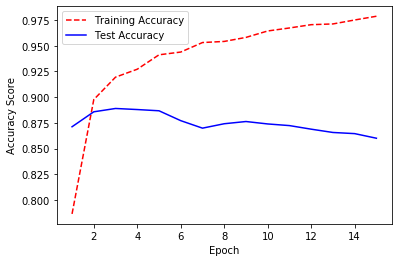

In [6]:
# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();